In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from copy import deepcopy
%matplotlib notebook

1. Să se verifice dacă funcția $ (1) $ admite un punct de minim unic și în caz afirmativ să se determine acesta folosind: <br>
<dl>
    <dd> &emsp; &ensp; 1. Metoda pasului descendent;</dd>
    <dd> &emsp; &ensp; 2. Metoda gradienților conjugați.</dd>
</dl>
Să se reprezinte pe graficul curbelor de nivel aproximarea obținută la fiecare iterație pentru cele două metode.

$$ f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x,y) = 12.5x^2+40.0xy+34.0y^2-3x-8y  \quad \quad \quad (1) $$

*Rezolvare:* <br>
&emsp; Aducem funcția (1) sub forma:

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$$ f:\mathbf{R}^n\longrightarrow\mathbf{R}, \quad f(x) = \frac{1}{2}x^T A x - b x  $$

&emsp; unde

$$ x =  \begin{bmatrix} \mathscr{x} \\ \mathscr{y} \end{bmatrix}, \quad x^T = \begin{bmatrix} \mathscr{x} & \mathscr{y} \end{bmatrix}, \quad A = \begin{bmatrix} \mathscr{a_{11}} & \mathscr{a_{12}} \\ \mathscr{a_{21}} & \mathscr{a_{22}} \end{bmatrix}, \quad b = \begin{bmatrix} \mathscr{b_1} \\ \mathscr{b_2} \end{bmatrix} $$


&emsp; Funcția (1) admite un unic punct de minim dacă și numai dacă matricea A este simetrică și pozitiv definită. În acest caz
$ x_{min} = \underset{x\in \mathbb{R}^2}{\operatorname{argmax} f(x) } $ se determină din ecuația:
$$ \nabla f(x_{min}) = 0 \Leftrightarrow Ax_{min}=b $$

&emsp; Punem condiția ca A să fie o matrice simetrică. Din relația $ A = A^{T} $, rezultă că $ A = \begin{bmatrix} \mathscr{a_{11}} & \mathscr{a_{12}} \\ \mathscr{a_{12}} & \mathscr{a_{22}} \end{bmatrix} $ .



&emsp; Din relația $\frac{1}{2}x^T A x - b x = 12.5x^2+40.0xy+34.0y^2-3x-8y $ obținem:

$$ A = \begin{bmatrix} 25 & 40.0 \\ 40.0 & 68.0 \end{bmatrix}, \quad b = \begin{bmatrix} 3.0 \\ 8.0 \end{bmatrix} $$


&emsp; **Graficul funcției pătratice definite de matricea A și vectorul b**

<IPython.core.display.Javascript object>


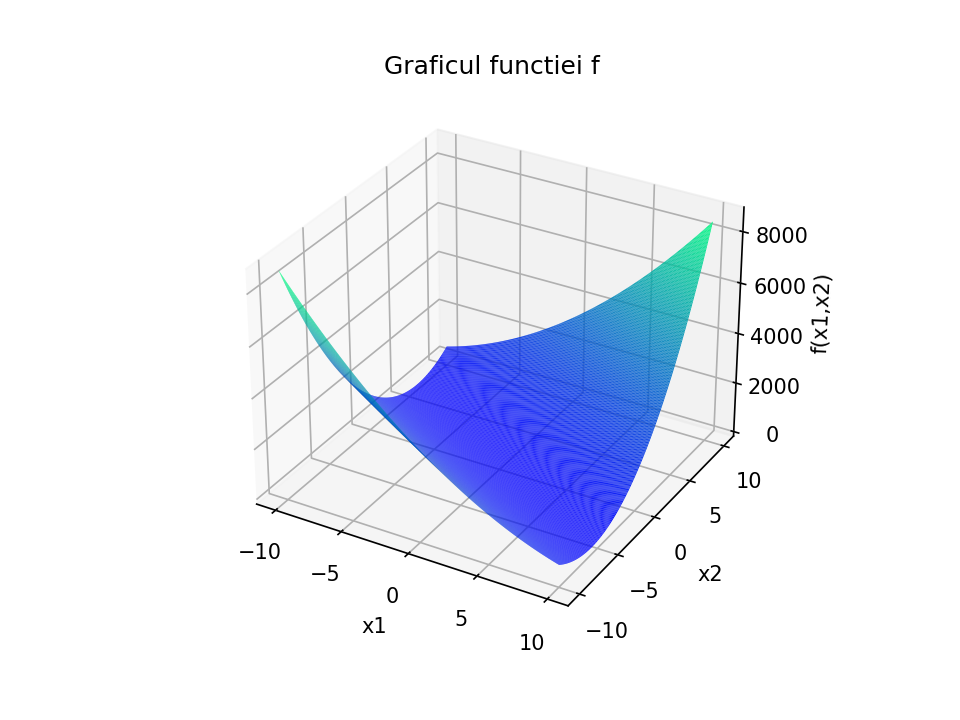

<IPython.core.display.Javascript object>


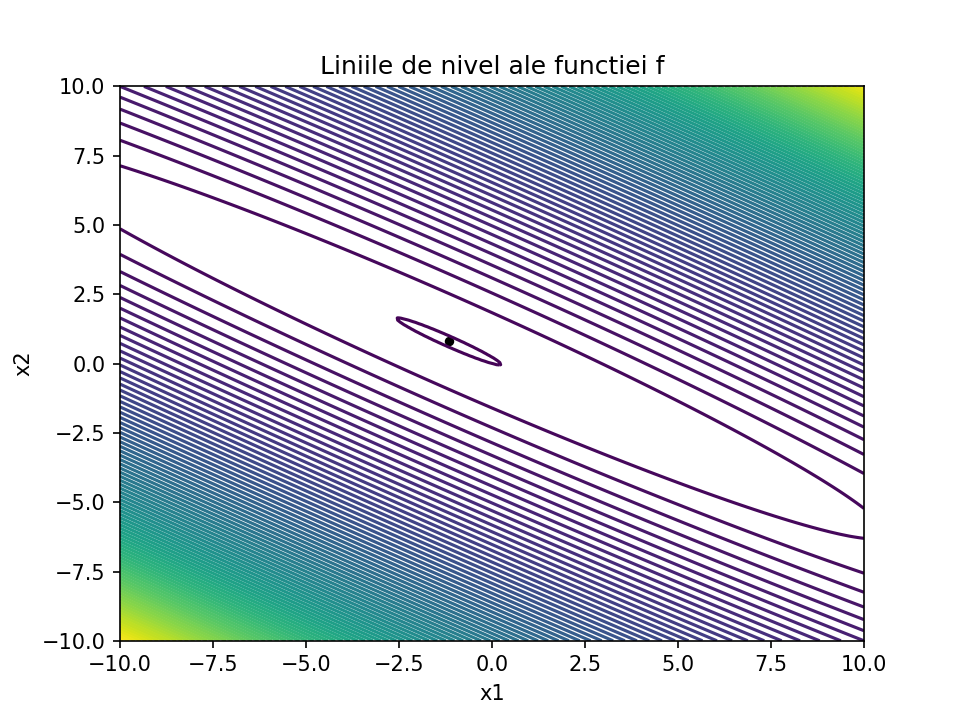

In [10]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 250 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-10, 10, size) # Axa x1
    x2 = np.linspace(-10, 10, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 100) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
    
    
def vizualizare_pasi(A,b,steps):
    # Constructia gridului asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig = plt.figure()
    plt.contour(X1,X2,X3,levels=100)
    
    # Ploteaza pasii algoritmului
    for i in range(len(steps) - 1):
        plt.plot([steps[i][0], steps[i+1][0]], [steps[i][1], steps[i+1][1]], linestyle='-', linewidth=3)
        
    plt.title('Metoda pasului descendent')
    plt.show()
    

def calculeaza_determinant(A):
    # Aplicam metoda Gauss cu pivotare totala
    m = A.shape[0]
    indices = np.arange(0, m)
    I = np.identity(m)
    A_extins = np.concatenate((A, I), axis = 1)
    s = 0 # numarul de schimbari de linii

    for k in range(0, m - 1):
        submatrice = A_extins[k:, k:m-1]
        (l, c) = np.unravel_index(submatrice.argmax(), submatrice.shape)
        l, c = l + k, c + k

        if l != k:
            s += 1

        if c != k:
            s += 1

        # Daca p != k atunci interschimbam liniile p si k, iar daca m != k interschimbam coloanele m si k
        A_extins[[l,k]] = A_extins[[k,l]]
        A_extins[:, [k, c]] = A_extins[:, [c, k]]
        # Schimbam indicii necunoscutelor
        indices[c], indices[k] = indices[k], indices[c]

        for i in range(k + 1, m):
            A_extins[i] = A_extins[i] - (A_extins[i][k] / A_extins[k][k]) * A_extins[k]


    U = np.copy(A_extins[0:m])

    determinant = 1.
    for i in range(m):
        determinant *= U[i][i]

    """
        Daca intr-o matrice patratica se schimba intre ele doua linii(sau coloane) se obtine o matrice care are
        determinantul egal cu opusul determinantului matricei initiale
    """
    determinant = (-1)**s * determinant
    
    return determinant


def pozitiv_definita(A):
    n = A.shape[0]
    for k in range(n):
        submatrice = deepcopy(A[:k+1][:k+1])
        det = calculeaza_determinant(submatrice)
        if det <= 0:
            print('Matricea A nu este pozitiv definita!')
            return False
        
    return True
    
    
# Definire functie f prin matricea A si vectorul b
A = np.array([[25, 40.0],[40.0, 68.0]])
b = np.array([[3.],[8.]])
x0 = np.array([[4.], [4.]])

# Apelare functii grafic
grafic_f(A,b)
linii_nivel(A,b)

<br>

&emsp; **Metoda pasului descendent(coborârea pe gradient)**

Punctul x0 are coordonatele (4.000000,4.000000)
Numarul de iteratii:  11
Punctul de minim are coordonatele (-1.160000,0.800000) 


<IPython.core.display.Javascript object>


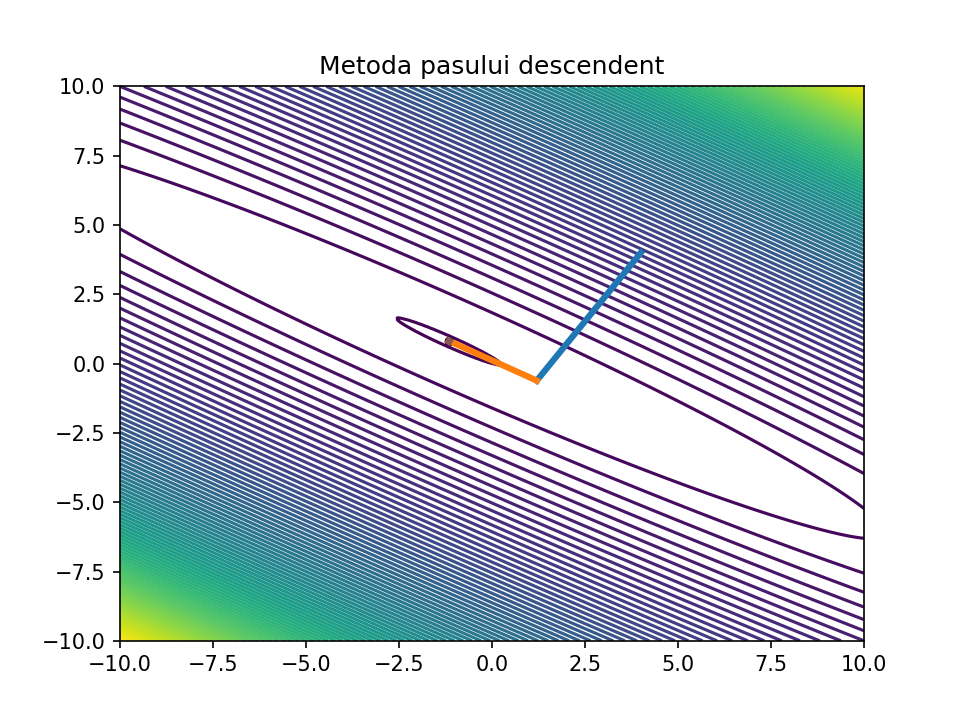

In [11]:
def metoda_pasului_descendent(A, b, x, epsilon=1e-12):
    # Inainte de a aplica metoda pasului descendent, verificam daca A este SPD
    if (A != A.T).any() | (pozitiv_definita(A) == False):
        raise ValueError('Matrice A trebuie sa fie simetrica si pozitiv definita!')
    
    x_steps, k = [x], 0
    r = b - A @ x
    while np.linalg.norm(r) > epsilon:
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        r = b - A @ x
        k += 1
        
        if k > 1000:
            print('Metoda diverge!')
            break
            
        x_steps.append(x)
    
    print('Numarul de iteratii: ', k)
    return x, x_steps


# Punctul de minim determinat prin metoda pasului descendent(coborarea pe gradient)
print('Punctul x0 are coordonatele (%f,%f)' % (x0[0], x0[1]))
(x_num, x_steps) = metoda_pasului_descendent(deepcopy(A),deepcopy(b),x0)
print('Punctul de minim are coordonatele (%f,%f) ' % (x_num[0], x_num[1]))
plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='.')
plt.show()

vizualizare_pasi(A,b,x_steps)

&emsp; **Metoda gradienților conjugați**

Punctul x0 are coordonatele (4.000000,4.000000)
Numarul de iteratii:  2
Punctul de minim are coordonatele (-1.160000,0.800000) 


<IPython.core.display.Javascript object>


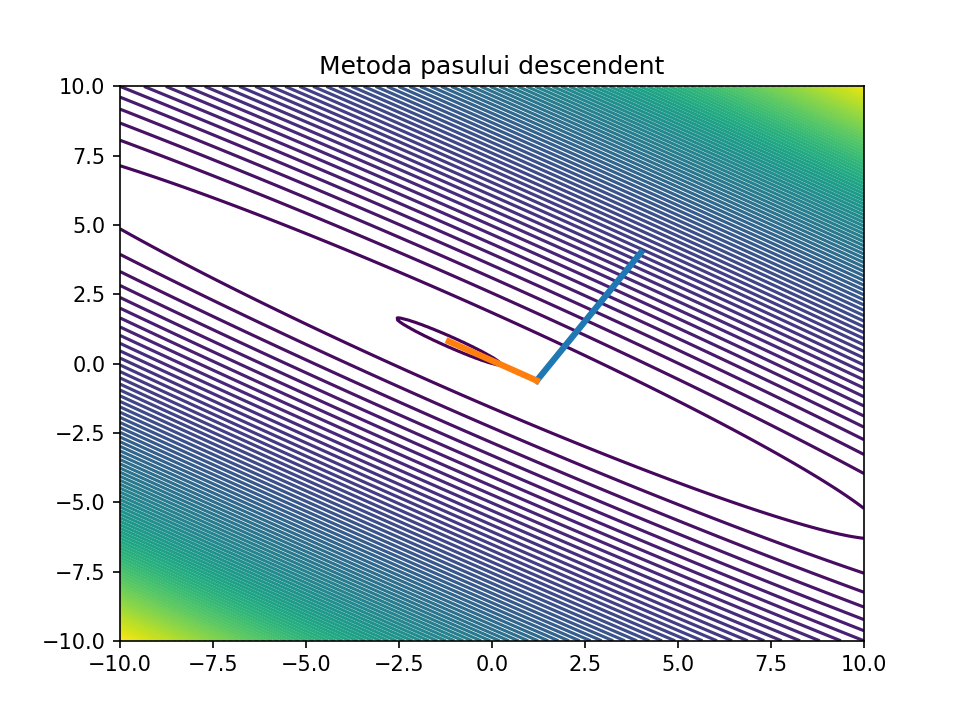

In [13]:
def metoda_gradientilor_conjugati(A, b, x, epsilon=1e-6):
    # Inainte de a aplica metoda gradientilor conjugati, verificam daca A este SPD
    # Matricea A este simetrica daca este egala cu transpusa sa
    # Matricea A este pozitiv definita daca toti minorii principali sunt pozitivi
    if (A != A.T).any() | (pozitiv_definita(A) == False):
        raise ValueError('Matrice A trebuie sa fie simetrica si pozitiv definita!')
    
    x_steps, k = [x], 0
    r = b - A @ x # reziduu
    d = b - A @ x # directia in care mergem
    while np.linalg.norm(r) > epsilon:
        alpha = (d.T @ r) / (d.T @ A @ d) # learning rate = cat mergem in directia v la pasul k
        x = x + alpha * d
        r = b - A @ x
        k += 1
        beta = (r.T @ A @ d) / (d.T @ A @ d)
        d = r - beta * d # directia in care mergem la pasul k+1
        if k > b.shape[0] + 2: # din cauza erorilor de calcul e posibil ca metoda sa nu returneze solutia in n iteratii
            print('Metoda diverge!')
            break
            
        x_steps.append(x)
    
    print('Numarul de iteratii: ', k)
    return x, x_steps


# Punctul de minim determinat prin metoda pasului descendent(coborarea pe gradient)
print('Punctul x0 are coordonatele (%f,%f)' % (x0[0], x0[0]))
(x_num, x_steps) = metoda_gradientilor_conjugati(deepcopy(A),deepcopy(b),x0)
print('Punctul de minim are coordonatele (%f,%f) ' % (x_num[0], x_num[1]))
plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='.')
plt.show()

vizualizare_pasi(A,b,x_steps)

2. Să se aproximeze  funcția $ (2) $ cu polinomul Lagrange $ P_n(x) $ determinat folosind metoda Newton. 
<br>
<dl>
    <dd> &emsp; &ensp; 1. Să se reprezinte grafic funcția exactă $ (2) $, nodurile de interpolare alese și aproximarea numerică obținută. Numărul de subintervale în care se va împărți domeniul, N, se va alege cel mai mic posibil astfel încât eroarea maximă de trunchiere să satisfacă relația $ \lVert e_{t} \rVert _{\infty} < 1e-5 $.
</dd>
    <dd> &emsp; &ensp; 2. Să se reprezinte într-o figură nouă eroarea de trunchiere.</dd>
</dl>

$$ f(x) = -\sin(3x)-8\cos(-5x)-14.37x,\quad x \in [-\pi, \pi] \quad \quad \quad (2)$$

*Rezolvare:* <br>
&emsp; Se consideră umătoarea reprezentare a polinomului Lagrange: <br>
$$ P_{n}(x) = c_1 + c_2(x-x_1) + c3(x-x_1)(x-x_2) + ... + c_{n+1}(x-x_1)(x-x_2)...(x-x_n) $$

&emsp; Condițiile $ P_n(x_i) = y_i $, unde $ (x_i)_{i=\overline{1,n+1}} $ este o diviziune a intervalului $ [-\pi, \pi] $ și $ y_i = f(x_i), \forall i=\overline{1,n+1} $, ne furnizează sistemul de ecuații liniare necesar pentru determinarea coeficienților $ c_i, \forall i=\overline{1,n+1} $ :

$$ \underbrace{ \begin{bmatrix} 1 & \cdots & \cdots & 0 \\  1 & (x_2 - x_1) & \cdots & 0 \\\vdots & \vdots & \ddots & \vdots \\ 
                   1 & (x_{n+1} - x_1) & \cdots & (x_{n+1} - x_1)...(x_{n+1} - x_n) \end{bmatrix} }_{A} 
    * \underbrace{ \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_{n+1} \end{bmatrix} }_{c}
    = \underbrace{ \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{n+1} \end{bmatrix}}_{y} $$
    
    
&emsp; Cum $x_i \neq x_j$, $1 \leq i < j \leq n+1 $, rezultă că $ det(A) = (x_2 - x_1)*...*(x_{n+1} - x_1)...(x_{n+1} - x_n) \neq 0 $, deci sistemul $Ac=y$ este compatibil determinat, i.e admite soluție unică. 

<IPython.core.display.Javascript object>


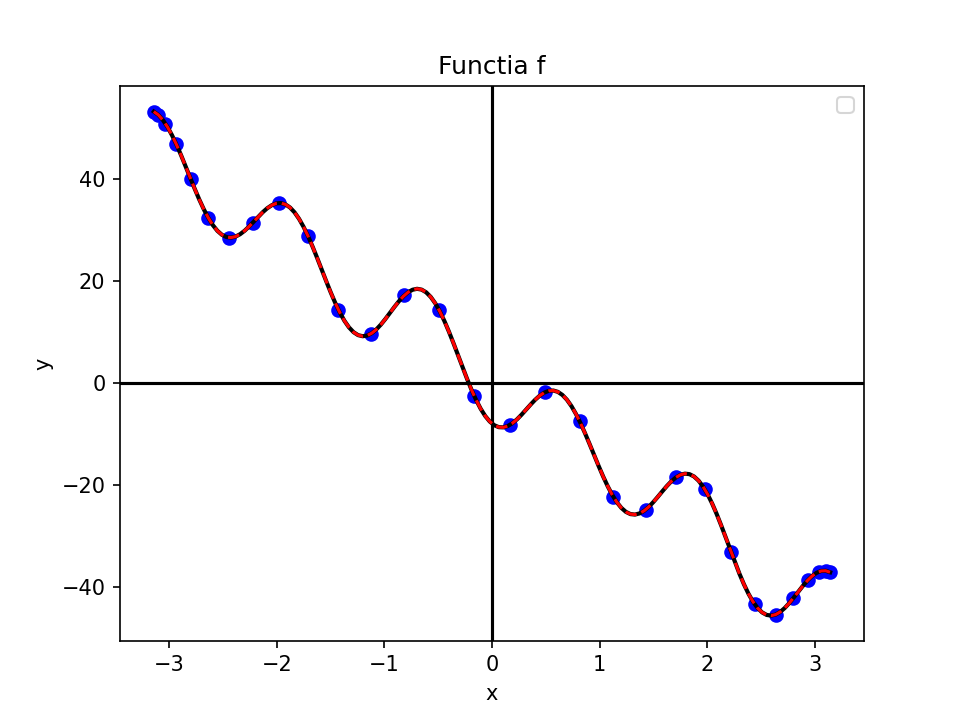

<IPython.core.display.Javascript object>


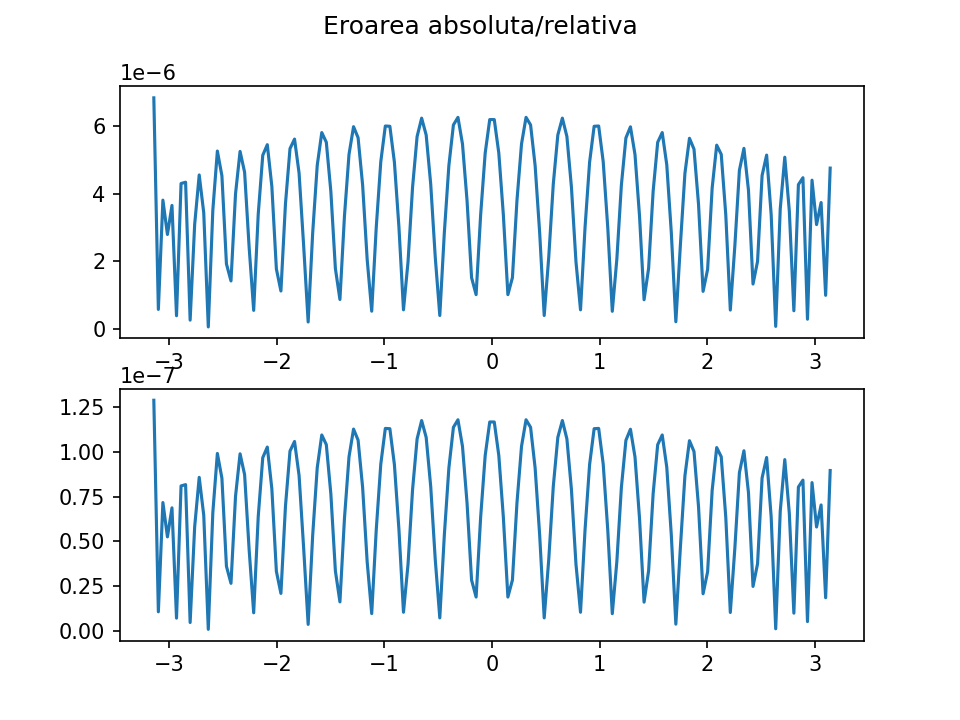

In [14]:
# Domeniul functiei
left, right = -np.pi, np.pi

# Functia pe care dorim sa o aproximam
def f(x):
    return -np.sin(3*x)-8*np.cos(-5*x)-14.37*x


# definim gradul polinomului de interpolare
n = 29

# Daca este setat la False se foloseste o discretizare echidistanta
n_cebasev =  True

# Pentru a evita oscilatiile puternice in capete in cazul unui polinom de rang foarte mare
# folosim o descretizare ce are nodurile distribuite dens in jurul capetelor intervalului
def nod_cebasev(a,b,k,n):
    return .5 * (a + b) + .5 * (b - a) * np.cos(((2 * k - 1) / (2 * n)) * np.pi )

def noduri_cebasev(a,b,n):
    return np.array([nod_cebasev(a,b,k,n) for k in range(1,n+1)])


# Metoda Substitutiei Ascendente
def metoda_substitutiei_ascendente(L, C, n):
    y = np.zeros(n)
    for i in range(0, n):
        y[i] = (C[i] - np.dot(L[i,:i+1], y[:i+1])) / L[i,i]
    return y


def eval_polinom(x_coordinates,c,x):
    sum = c[0]
    for i in range(1,n+1):
        prod = c[i]
        for j in range(0,i):
            prod *= (x - x_coordinates[j])
        sum += prod
        
    return sum


def polinom(x_coordinates, puncte, c):
    return np.array([eval_polinom(x_coordinates,c,x) for x in puncte])


# plotarea functiei f pe intervalul [left,right]
x_grafic = np.linspace(left, right, 150)
y_grafic = f(x_grafic)
plt.figure(0)
plt.title('Functia f')
plt.legend(['f(x)', 'x']) 
plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(x_grafic, y_grafic, c="black", linestyle="-", linewidth=2)


# nodurile de interpolare
x_coordinates = None
if n_cebasev:
    x_coordinates = noduri_cebasev(left,right,n+1)
else:
    x_coordinates = np.linspace(left,right,n+1)
y_coordinates = f(x_coordinates)
# plotam nodurile de interpolare
plt.scatter(x_coordinates, y_coordinates, c="blue", alpha=1)


# Determinam coeficientii polinomului de interpolare rezolvand sistemul A*c=y
A = np.zeros((n+1,n+1)) # matrice inferior triunghiulara
for i in range(n+1):
    A[i][0] = 1
    
for i in range(1,n+1):
    for j in range(1,i+1):
        for k in range(0,j):
            if A[i][j] == 0:
                A[i][j] = (x_coordinates[i] - x_coordinates[k])
            else:
                A[i][j] *= (x_coordinates[i] - x_coordinates[k])
# Sistem inferior triunghiular ce se rezolva conform metodei substitutiei ascendente
c = metoda_substitutiei_ascendente(A,y_coordinates,n+1)

plt.plot(x_grafic, polinom(x_coordinates,x_grafic,c), linestyle='--', color = 'red')
plt.show()

# Eroarea absoluta si eroarea relativa normalizata
abs_error = np.abs(polinom(x_coordinates,x_grafic,c) - f(x_grafic))
rel_error = abs_error / max(f(x_grafic))

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Eroarea absoluta/relativa')
ax1.plot(x_grafic, abs_error)
ax2.plot(x_grafic, rel_error)
plt.show()

3. Să se aproximeze funcția $ (3) $ folosind interpolare cu funcții spline cubice.
<br>
<dl>
    <dd> &emsp; &ensp; 1. Să se reprezinte grafic funcția exactă $ (3) $, nodurile de interpolare alese și aproximarea numerică obținută. Numărul de subintervale în care se va împărți domeniul, N, se va alege cel mai mic posibil astfel încât eroarea maximă de trunchiere să satisfacă relația $ \lVert e_{t} \rVert _{\infty} < 1e-5 $.
</dd>
    <dd> &emsp; &ensp; 2. Să se reprezinte într-o figură nouă eroarea de trunchiere.</dd>
</dl>

$$ f(x) = -5\sin(-5x)+\cos(-2x)+0.8x,\quad x \in [-\pi, \pi] \quad \quad \quad (3) $$

<IPython.core.display.Javascript object>


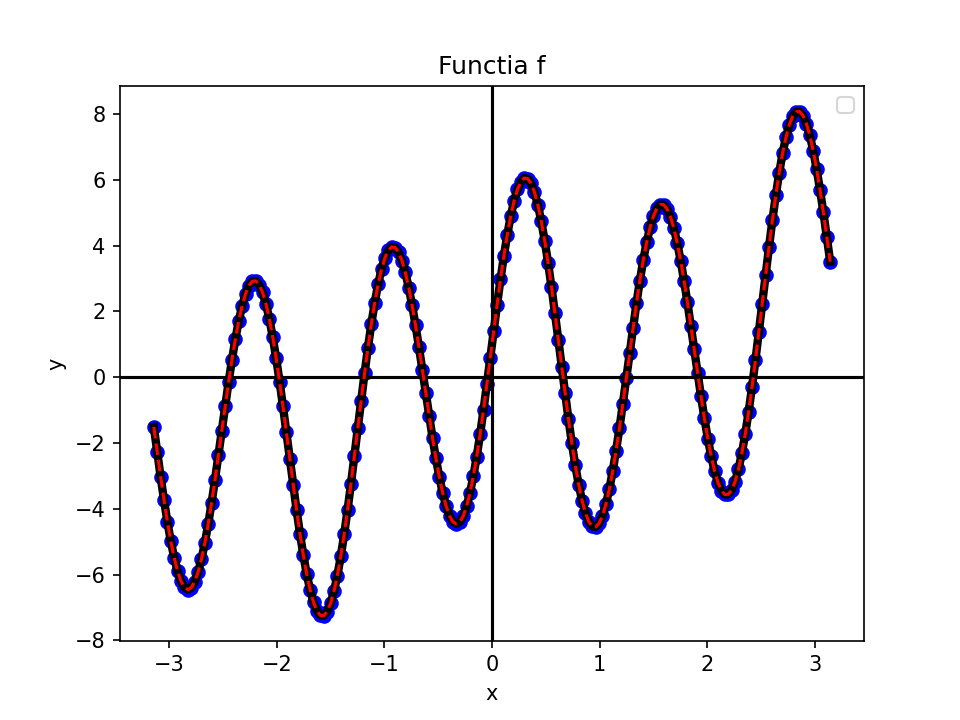

199 200 199 199


<IPython.core.display.Javascript object>


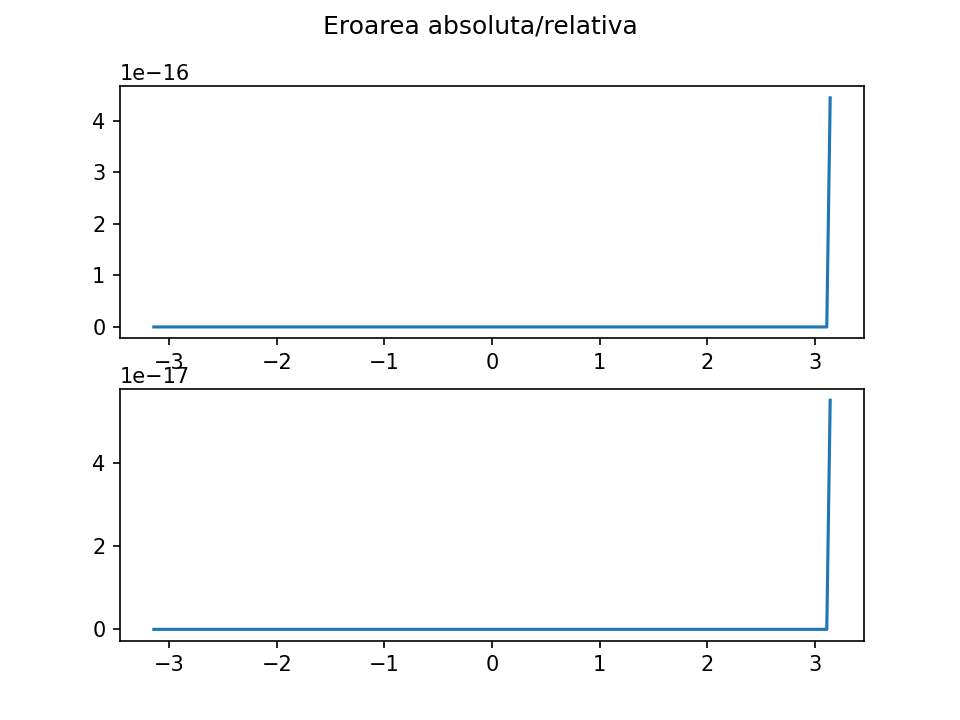

In [41]:
# Domeniul functiei
left, right = -np.pi, np.pi

# numarul de puncte distantate uniform pe intervalul [left,right](x_grafic.shape[0] = n_puncte)
n_puncte = 200

# numarul de intervale
n = 199

# Functia pe care dorim sa o aproximam
def fun(x):
    return 5 * np.sin(5 * x) + np.cos(2 * x) + 0.8 * x

# Derivata functiei pe care dorim sa o aproximam
def fun_derivat(x):
    return 25 * np.cos(5 * x) - 2 * np.sin(2 * x) + 0.8


def metoda_substitutiei_descendente(U, C, n):
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (C[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i][i]
    return x

# Determina solutia unui sistem patratic ce admite solutie unica
def gauss_pivotare_totala(A, C):
    n = A.shape[0]

    indices = np.arange(0, n)
    A_extins = np.concatenate((A, C), axis = 1)

    for k in range(0, n - 1):
        submatrice = A_extins[k:, k:n-1]
        (p, m) = np.unravel_index(submatrice.argmax(), submatrice.shape)
        p, m = p + k, m + k

        # Daca p != k atunci interschimbam liniile p si k, iar daca m != k interschimbam coloanele m si k
        A_extins[[p,k]] = A_extins[[k,p]]
        A_extins[:, [k, m]] = A_extins[:, [m, k]]
        # Schimbam indicii necunoscutelor
        indices[m], indices[k] = indices[k], indices[m]

        for l in range(k + 1, n):
            A_extins[l] = A_extins[l] - (A_extins[l][k] / A_extins[k][k]) * A_extins[k]


    U = np.copy(A_extins[0:n])
    U = np.delete(U, n, axis = 1)
    C = A_extins[:,n]
    
    # Aplicam metoda substitutiei descendente
    x = metoda_substitutiei_descendente(U, C, n)
    
    # La interschimbarea a doua coloane se schimba ordinea necunoscutelor in vectorul x
    return x[indices]


x_grafic = np.linspace(left, right, n_puncte)            
y_grafic = fun(x_grafic)

# Obtinem nodurile de interpolare
x_coordinates = np.linspace(left, right, n+1) # diviziune echidistanta cu pasul h
y_coordinates = fun(x_coordinates)

# Plotam functia
plt.figure(1)
plt.title('Functia f')
plt.legend(['f(x)', 'x']) 
plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(x_grafic, y_grafic, c="black", linestyle="-", linewidth=4.0)

# plotam nodurile de interpolare
plt.scatter(x_coordinates, y_coordinates, c="blue", alpha=1)


def spline_cubica(a,b,c,d,x_i):
    return lambda x : a + b * (x - x_i) + c * (x - x_i) ** 2 + d * (x - x_i) ** 3

# Determinam coeficientii a, b, c, d
a = y_coordinates[0:n]

# Pentru determinarea coeficientilor b trebuie rezolvat sistemul B * b = termeni_liberi, unde B este matricea tridiagonala:
B = np.zeros((n+1,n+1))
B[0,0], B[n,n] = 1, 1
for i in range(1, n):
    B[i,i-1], B[i,i], B[i,i+1] = 1, 4, 1

termeni_liberi = np.zeros((n+1,1))    
termeni_liberi[0] = fun_derivat(x_coordinates[0])
for i in range(1,n):
    h = x_coordinates[i+1] - x_coordinates[i]
    termeni_liberi[i] = (3 / h) * (y_coordinates[i+1] - y_coordinates[i-1])
termeni_liberi[n] = fun_derivat(x_coordinates[n])

b = gauss_pivotare_totala(B,termeni_liberi) 

c = np.zeros(n)
for i in range(n):
    h = x_coordinates[i+1] - x_coordinates[i]
    c[i] = (y_coordinates[i+1] - y_coordinates[i]) * (3 / h ** 2) - (b[i+1] + 2 * b[i]) / h
    
d = np.zeros(n)
for i in range(n):
    h = x_coordinates[i+1] - x_coordinates[i]
    d[i] = (y_coordinates[i+1] - y_coordinates[i]) * (2 / h ** 3) * (-1) + (b[i+1] + b[i]) / h ** 2

    
S = np.piecewise(
        x_grafic,
        [
            (x_coordinates[i] <= x_grafic) & (x_coordinates[i+1] > x_grafic) for i in range(n-1)
        ],
        [
            spline_cubica(a[i],b[i],c[i],d[i],x_coordinates[i]) for i in range(n)
        ] 
    )

plt.plot(x_grafic, S, linestyle= '--', color='red')
plt.show()

# Eroarea absoluta si eroarea relativa normalizata
abs_error = np.abs(S - fun(x_grafic))
rel_error = abs_error / max(fun(x_grafic))

print(a.shape[0], b.shape[0], c.shape[0], d.shape[0])

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Eroarea absoluta/relativa')
ax1.plot(x_grafic, abs_error)
ax2.plot(x_grafic, rel_error)
plt.show()